#### Introduction
In this project I worked on the Initial Public Offerings (IPO) in the Indian market. I build a deep learning classification model to determine if there will be listing gains for the IPO. Listing gains are the percentage increase in the share price of a company from its IPO issue price on the day of listing.

The dataset for this project contains information on past IPOs in the Indian market and comes from [moneycontrol](https://www.moneycontrol.com/ipo/ipo-historic-table?classic=true).

#### Data Dictionary
The data consists of following column

Date: date when the IPO was lised

IPOName: name of the IPO

Issue_Size: size of the IPO issue, in INR Crores

Subscription_QIB: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category

Subscription_HNI: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category

Subscription_RII: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category

Subscription_Total: total number of times the IPO was subs
cribed overall

Issue_Price: the price in INR at which the IPO was issued

Listing_Gains_Percent: is the percentage gain in the listing price over the issue price


## Data Investigation

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from math import sqrt

print("All libraries imported successfully!")


All libraries imported successfully!


In [2]:
market_df = pd.read_csv("Indian_IPO_Market_Data.csv")
market_df

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20
...,...,...,...,...,...,...,...,...,...
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24


In [3]:
# first five rows of the dataset
market_df.head(5)

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [4]:
# last five rows of the dataset
market_df.tail(5)

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24
318,17/10/22,Electronics Mar,500.00,58.81,15.39,8.27,24.23,59,43.14


In [5]:
# information about the columns in the dataset
market_df.columns

Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent'],
      dtype='object')

In [6]:
#summary statistics for the Listing_Gains_Percent variable in the dataset
gains_stat = market_df["Listing_Gains_Percent"].describe()
gains_stat

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

In [7]:
#summary statistics for all variables of the dataset
dataset_stat = market_df.describe()
dataset_stat

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000


In [8]:
market_df

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20
...,...,...,...,...,...,...,...,...,...
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24


In [9]:
print(market_df["Listing_Gains_Percent"])

0      11.82
1     -84.21
2      17.13
3     -11.28
4      -5.20
       ...  
314    42.30
315    41.92
316    -3.15
317    47.24
318    43.14
Name: Listing_Gains_Percent, Length: 319, dtype: float64


In [10]:
#check for null in the Listing_Gains_Percent
market_df["Listing_Gains_Percent"].isnull().sum()

0

In [11]:
market_df.isna().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
dtype: int64

In [12]:
market_df["Listing_Gains_Percent"].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

In [13]:
market_df

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20
...,...,...,...,...,...,...,...,...,...
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24


In [14]:
#Create a categorical target variable, Listing_Gains_Profit, which takes the binary values 1 
#when Listing_Gains_Percent is positive and 0 otherwise.

market_df['Listing_Gains_Profit'] = np.where(market_df['Listing_Gains_Percent'] > 0, 1, 0)
market_df['Listing_Gains_Percent'].value_counts()


Listing_Gains_Percent
 7.35     2
 0.00     2
 3.06     2
-5.00     2
 23.19    2
         ..
-13.09    1
-44.81    1
-0.02     1
-97.15    1
 43.14    1
Name: count, Length: 312, dtype: int64

In [15]:
# percentage of the IPOs listed at a profit?
market_df['Listing_Gains_Profit'].value_counts(normalize=True)

Listing_Gains_Profit
1    0.545455
0    0.454545
Name: proportion, dtype: float64

In [16]:
# Irrelevant columns are droppped from the dataset
market_df = market_df.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'], axis=1)
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 16.3 KB


In [17]:
market_df

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
0,189.80,48.44,106.02,11.08,43.22,165,1
1,328.70,59.39,51.95,3.79,31.11,145,0
2,56.25,0.99,16.60,6.25,5.17,75,1
3,199.80,1.12,3.65,0.62,1.22,165,0
4,0.00,0.52,1.52,2.26,1.12,75,0
...,...,...,...,...,...,...,...
314,840.13,42.42,7.13,2.84,15.59,220,1
315,562.10,27.48,14.18,24.19,23.25,326,1
316,792.00,0.51,1.77,3.44,1.39,525,0
317,755.00,113.82,40.36,12.44,47.19,330,1


## Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

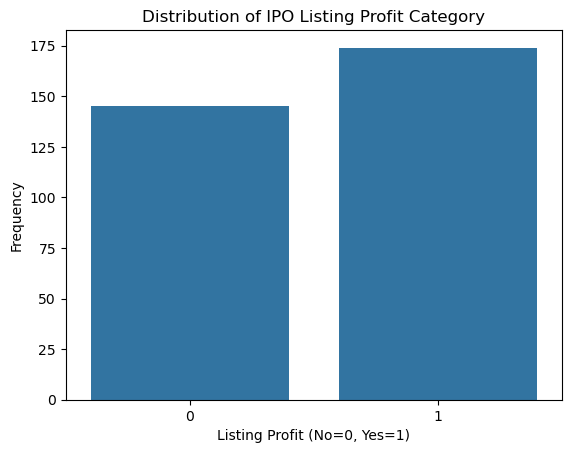

In [18]:
# countplot to visualize the distribution of the target variable
sns.countplot(x ="Listing_Gains_Profit", data=market_df)
plt.title("Distribution of IPO Listing Profit Category")
plt.ylabel("Frequency")
plt.xlabel("Listing Profit (No=0, Yes=1)")
plt.show

#### Outliers Check
Plots is used to check for the presence of outliers in each of the continuous variables of the dataset


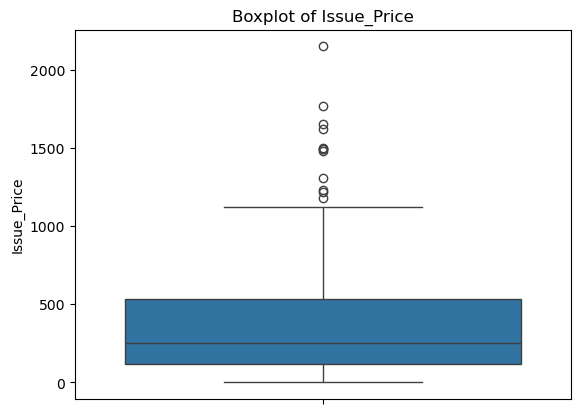

In [19]:
#check for the presence of outliers in Issue_Price
sns.boxplot(data=market_df, y='Issue_Price')
plt.title('Boxplot of Issue_Price')
plt.show()

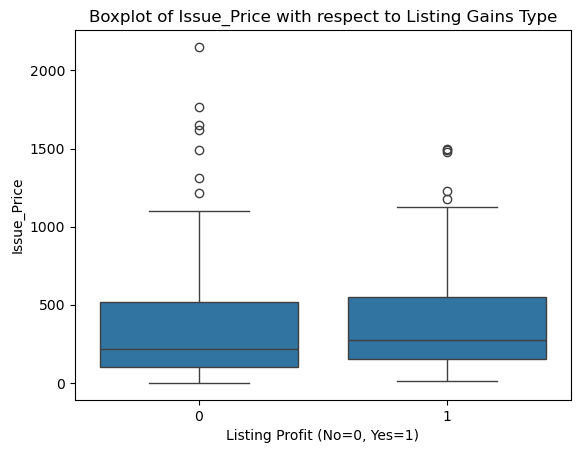

In [20]:
sns.boxplot(data=market_df, x='Listing_Gains_Profit', y='Issue_Price')
plt.title('Boxplot of Issue_Price with respect to Listing Gains Type')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.show()

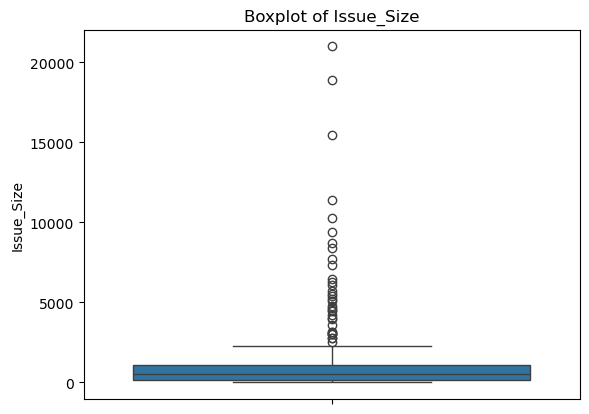

In [21]:
#check for the presence of outliers in Issue_Size
sns.boxplot(data=market_df, y='Issue_Size')
plt.title('Boxplot of Issue_Size')
plt.show()

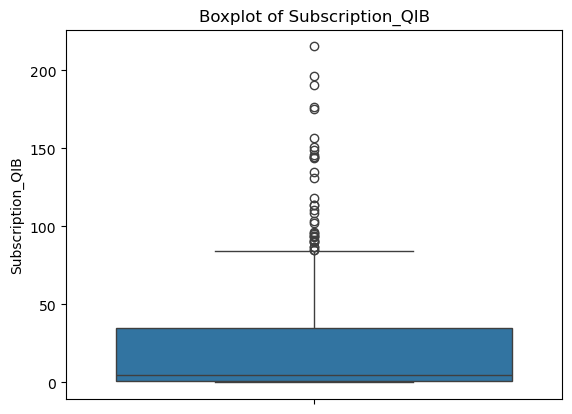

In [22]:
#check for the presence of outliers in Subscription_QIB
sns.boxplot(data=market_df, y='Subscription_QIB')
plt.title('Boxplot of Subscription_QIB')
plt.show()

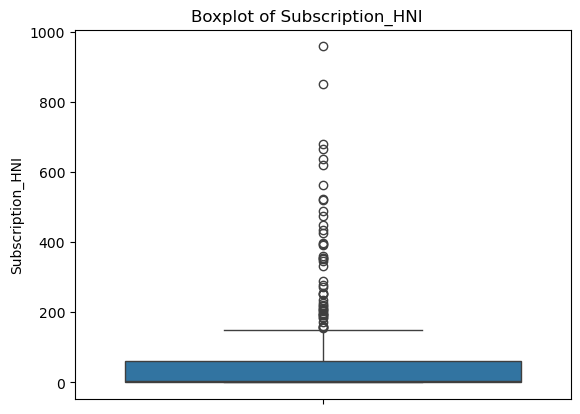

In [23]:
#check for the presence of outliers in Subscription_HNI      
sns.boxplot(data=market_df, y='Subscription_HNI')
plt.title('Boxplot of Subscription_HNI      ')
plt.show()

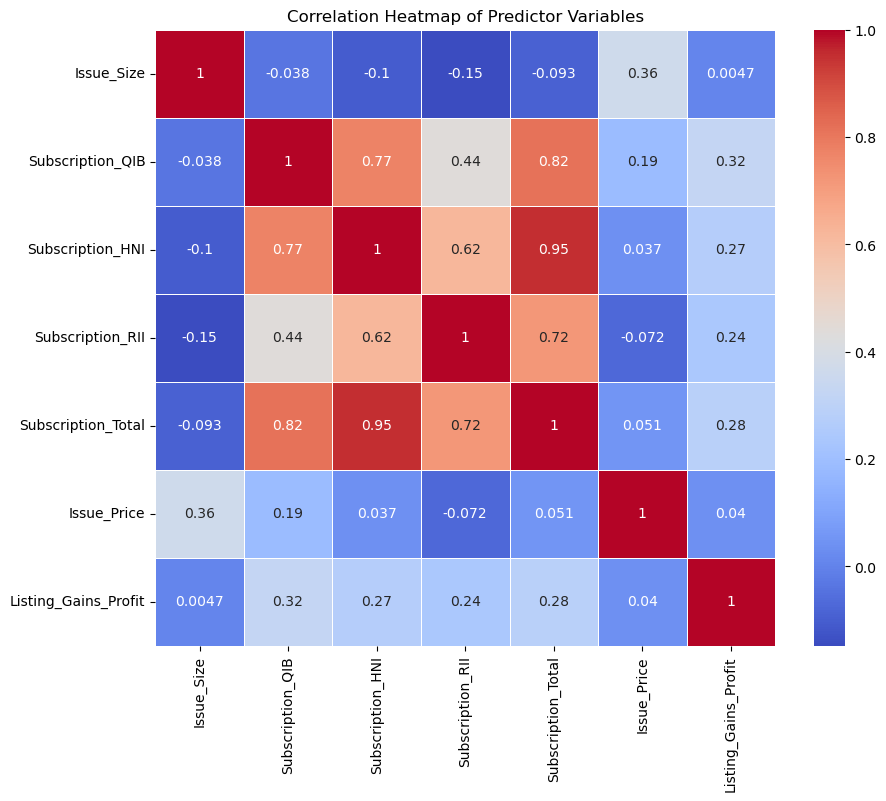

In [24]:
# check for correllation
plt.figure(figsize=(10,8))
sns.heatmap(market_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

#### Key Findings from Outlier Investigation

* The histogram and the boxplots show that outliers are present in the data and might need outlier treatment.
* The boxplot of Issue_Price, with respect to Listing_Gains_Profit, shows that there are more outliers for IPOs that listed a loss than there are outliers for IPOs that listed a profit.
* There are correlations between some variables while others show poor correlation and good correlation.


#### Treating Outliers


In [25]:
#check for skewnes for numerical variables
market_df.skew()

Issue_Size              4.853402
Subscription_QIB        2.143705
Subscription_HNI        3.078445
Subscription_RII        3.708274
Subscription_Total      2.911907
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64

###### Findings from skewness check
Skewness values greater than 1 indicate a significant departure from symmetry, suggesting the presence of outliers or non-normal distribution.



##### Handling outlier in Issue_Size 
Interquartile menthod was used to address the outlierS. I clipped the variable values between the upper and lower bounds.

In [26]:
#handling outlier in Issue_Size 
q1 = market_df['Issue_Size'].quantile(q=0.25)
q3 = market_df['Issue_Size'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 930.995
lower = -1227.4875000000002
upper = 2496.4925000000003


In [27]:
# use clip method
market_df['Issue_Size'] = market_df['Issue_Size'].clip(lower, upper)
market_df['Issue_Size'].describe()

count     319.000000
mean      763.561238
std       769.689122
min         0.000000
25%       169.005000
50%       496.250000
75%      1100.000000
max      2496.492500
Name: Issue_Size, dtype: float64

In [28]:
#check for skewness
market_df['Issue_Size'].skew()

1.2246204359225623

##### Handling outlier in Subscription_QIB 

In [29]:
#handling outlier in Subscription_QIB 
q1 = market_df['Subscription_QIB'].quantile(q=0.25)
q3 = market_df['Subscription_QIB'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 33.48500000000001
lower = -49.07750000000001
upper = 84.86250000000001


In [30]:
# use clip method
market_df['Subscription_QIB'] = market_df['Subscription_QIB'].clip(lower, upper)
market_df['Subscription_QIB'].describe()

count    319.000000
mean      21.521183
std       29.104549
min        0.000000
25%        1.150000
50%        4.940000
75%       34.635000
max       84.862500
Name: Subscription_QIB, dtype: float64

In [31]:
#check for skewness
market_df['Subscription_QIB'].skew()

1.262734274613526

##### Handling outlier in Subscription_HNI 

In [32]:
#handling outlier in Subscription_QIB 
q1 = market_df['Subscription_HNI'].quantile(q=0.25)
q3 = market_df['Subscription_HNI'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 60.839999999999996
lower = -90.005
upper = 153.355


In [33]:
# use clip method
market_df['Subscription_HNI'] = market_df['Subscription_HNI'].clip(lower, upper)
market_df['Subscription_HNI'].describe()

count    319.000000
mean      40.356426
std       57.427921
min        0.000000
25%        1.255000
50%        5.070000
75%       62.095000
max      153.355000
Name: Subscription_HNI, dtype: float64

In [34]:
#check for skewness
market_df['Subscription_HNI'].skew()

1.1816363175334872

##### Handling outlier in Subscription_RII 

In [35]:
#handling outlier in Subscription_QIB 
q1 = market_df['Subscription_RII'].quantile(q=0.25)
q3 = market_df['Subscription_RII'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 7.33
lower = -9.72
upper = 19.6


In [36]:
# use clip method
market_df['Subscription_RII'] = market_df['Subscription_RII'].clip(lower, upper)
market_df['Subscription_RII'].describe()

count    319.000000
mean       6.060940
std        6.176882
min        0.000000
25%        1.275000
50%        3.420000
75%        8.605000
max       19.600000
Name: Subscription_RII, dtype: float64

In [37]:
#check for skewness
market_df['Subscription_RII'].skew()

1.12917087322117

##### Handling outlier in Subscription_Total 

In [38]:
#handling outlier in Subscription_QIB 
q1 = market_df['Subscription_Total'].quantile(q=0.25)
q3 = market_df['Subscription_Total'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr) 
print('IQR = ', iqr, '\nlower = ', lower, '\nupper = ', upper, sep='')

IQR = 31.749999999999996
lower = -45.97999999999999
upper = 81.01999999999998


In [39]:
# use clip method
market_df['Subscription_Total'] = market_df['Subscription_Total'].clip(lower, upper)
market_df['Subscription_Total'].describe()

count    319.000000
mean      20.456646
std       27.217740
min        0.000000
25%        1.645000
50%        4.930000
75%       33.395000
max       81.020000
Name: Subscription_Total, dtype: float64

In [40]:
#check for skewness
market_df['Subscription_Total'].skew()

1.2938804195699385

In [41]:
# Skweness after treating outliers in the dataset
market_df.skew()

Issue_Size              1.224620
Subscription_QIB        1.262734
Subscription_HNI        1.181636
Subscription_RII        1.129171
Subscription_Total      1.293880
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64

#### Setting the Target and Predictor Variables

In [84]:
#Create target and predictor variables
target_variable = ["Listing_Gains_Profit"]
predictor = list(set(list(market_df.columns)) - set(market_df["Listing_Gains_Profit"]))

print("_________PREDICTOR VARIABLES_________")
print(predictor)
print("_________TARGET VARIABLE_________")
print(target_variable)

_________PREDICTOR VARIABLES_________
['Subscription_Total', 'Issue_Price', 'Listing_Gains_Profit', 'Subscription_HNI', 'Issue_Size', 'Subscription_RII', 'Subscription_QIB']
_________TARGET VARIABLE_________
['Listing_Gains_Profit']


In [86]:
#normalize the predictor variable
market_df[predictor] = market_df[predictor]/market_df[predictor].max()
market_df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.174478,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.164604,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.055349,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.116279,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.249302,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In tn the above few steps, I have created an object of the dependent variable called target_variable and also a list of all the features, excluding the target variable Listing_Gains_Profit. 

Ealier in the analysis, during data exploration, distribution of the variables differed significantly. This could influence the modeling process, so to prevent this, normalization by scaling the predictors was done. exploring the normalize value, it is seen that the normalized values of the predictors lie between 0 and 1.

#### Creating the Holdout Validation Approach

In [87]:
X = market_df[predictors].values
y = market_df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape); print(X_test.shape)

(223, 7)
(96, 7)


hold out validation approach was usedto model evaluation. In this approach, I divided the data in the 70:30 ratio, where I will use 70% of the data for training the model, while the other 30% of the data to test the model. 

#### Define the Deep Learning Classification Model

In [88]:
# defining the model used
tf.random.set_seed(100)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(4, activation= 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))    

F:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In this step, above I have defined the model by instantiating the sequential model class in TensorFlow's Keras. 

The model architecture is comprised of four hidden layers with `relu` as the activation function. 

The output layer uses a `sigmoid` activation function, which is a good choice for a binary classification model.

#### Compile and Train the Model

In [89]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [90]:
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [94]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 5.1829e-05 
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 5.1330e-05 
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 5.0838e-05 
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 5.0351e-05 
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 4.9871e-05 
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 4.9397e-05 
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 4.8930e-05 
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 4.8469e-05 
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 4.8014e-05 
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 4.7563e-05 
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 4.7120e-05 
Epoch 12/250
7/7 ━━━━━━━━━━━━━

The model was compiled with an appropriate optimizer, a loss function, and an evaluation metric. After compiling the model, it was fitted on the training set, and the epoch count was set to 250. It is observed that the accuracy improved over the 250 epochs. 

#### Model Evaluation

In [97]:
model.evaluate(X_train, y_train)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 1.0125e-05 


[8.837771019898355e-06, 1.0]

In [100]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 8.2486e-06


[7.649793587916065e-06, 1.0]

The model evaluation output shows the performance of the model on both training and test data. The accuracy was approximately 98% on the training data and 91% on the test data. Ideally, the higher the accuracy value, the better the model is performing. It's noteworthy that the training and test set accuracies are close to each other, which shows that there is consistency and that the accuracy doesn't drop too much when we test the model on unseen data.

#### Conclusion

In this project, I have built Deep Learning Classification models using the deep learning framework, Keras, in TensorFlow. I used a real-world IPO dataset and built a classifier algorithm to predict whether an IPO will list at profit or not.

The accuracy was approximately 98% on the training data and 91% on the test data. The accuracy is consistent across the training and test datasets, which is a promising sign. 